In [14]:
import sys
import random
sys.path.append("../")
sys.path.append("../../")
from pprint import pprint
from Core.maze import Maze, INF

import numpy as np

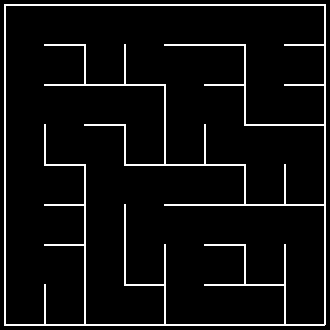

In [36]:
maze = Maze()
N = 8
maze.load(f"BinaryTree_{N}x{N}.maze")
display(maze.draw(cell_width=40))

# Q Learning
add some basic intro 

In [ ]:
LEARNING_RATE = 0.1
DISCOUNT = 0.90

In [35]:
# setup the q table
q_table = []

for i in range(maze.num_rows):
    for j in range(maze.num_columns):
        temp = []
        for value in maze.grid[i][j].neighbors.values():
            # the edges which are walls have value as -inf, 
            # to discourage any agent trying to go from there
            temp.append(-value)
        q_table.append(temp)

print(len(q_table))
print(q_table[0])
print(q_table[-1])

64
[-inf, 0, -inf, 0]
[0, -inf, -inf, -inf]


## Reward
on reaching the end, we give the agent 0 reward, else, its -1 for every timestep

In [39]:
def reward(state):
    """
    takes input as current cell state.

    returns 0 if cell is the end state, else -1
    """

    if state[0] == maze.num_rows - 1 and state[1] == maze.num_columns - 1:
        return 0
    else:
        return -1


In [50]:
def get_next_cell(current_cell, action):
    """
    input:
        current_state:
            the current tuple of indices in the grid
        action:
            any of [0, 1, 2, 3] 
            taking the directions N, S, W, E respectively

    returns:
        the index tuple of the next state
    """

    if not (0 <= action < 4):
        raise ValueError(f"Invalid action {action}. Must be in [0, 3] range.")
    
    x, y = current_cell
    
    if not (0 <= x < maze.num_rows):
        raise ValueError(f"Current state {x} out of row range {maze.num_rows}")
    if not (0 <= y < maze.num_columns):
        raise ValueError(f"Current state {x} out of row range {maze.num_columns}")

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    dx, dy = directions[action]
    return (x+dx, y+dy)


In [64]:
def cell_to_state(cell):
    """
    input:
        cell:
            tuple of indices
    return:
        state:
            the mapping to the linearised q-table index
    """
    return cell[0]*maze.num_rows + cell[1]

In [65]:
def state_to_cell(state):
    """
    input:
        state:
            the mapping to the linearised q-table index
    return:
        cell:
            tuple of indices
    """
    quotient = state//maze.num_rows
    remainder = state - quotient * maze.num_rows
    return (quotient, remainder)

In [69]:
# print(cell_to_state(state_to_cell(8)))
# print(cell_to_state((0, 5)))
# print(state_to_cell(cell_to_state((0, 5))))